## AI tool exploration

13/10/2024

Below I list the beginnings of the exploration for tool use, and they mainly revolve around LLM use and YOLOv5. It's an amalgamation of different sketchbooks I have open; I have tried to impose a sense of order on it, but it may not make sense. At the very least, elements of what I am working on is recorded and I'm happy to discuss or explain it. 

The below assumes you are on Windows and have Git installed. It also assumes you have a Python environment that is ready for _alot_ of installs. You might consider creating a new environment or virtual environment to run this.

**Warning** This is a live document of sorts, the information here could be right or wrong. Treat this more like a diary than a finished SOP.

### ComfyUI

I've mentioned this before, ComfyUI is a handy GUI that runs on localhost that can be used for image / video manipulation, generation, all that type of thing. I haven't fully explored it, but it doesn't take long to find useful workflows developed out there in the wild. I'll list below the very bare bones of getting this installed on your system.

1. Navigate to a folder to install, open Command Line in that folder, enter the below:

```git clone https://github.com/comfyanonymous/ComfyUI```

If you read the Github page, you will see it has a Windows installer. *I highly recommend you do not bother with this and go the Github route instead*

```cd ComfyUI ```

Simply typing ```python main.py ``` should get the ball rolling. You will see on the readme it recommends PyTorch for Cuda 12.4 (with a command) - I haven't bothered with this, I'm not sure what PyTorch / CUDA version I have, I think they're both latest release. See how you get on. 

If it works, it will give you a localhost url, paste it into your browser and there you have ComfyUI.

### ComfyUI Manager

Navigate to ```ComfyUI\custom_nodes``` and run the following in command line: ```git clone https://github.com/ltdrdata/ComfyUI-Manager.git```. Then follow any readme instructions. You will need to do more installing and refreshing.

Once you're done, you can conveniently download any tools developed by others. This avoids having to do a Git Clone for each tool you want to use, and makes it easier to manage updates of those tools.

You may have seen these images on my branch (massive images incoming I dont know how to resize pasted images in markdown):

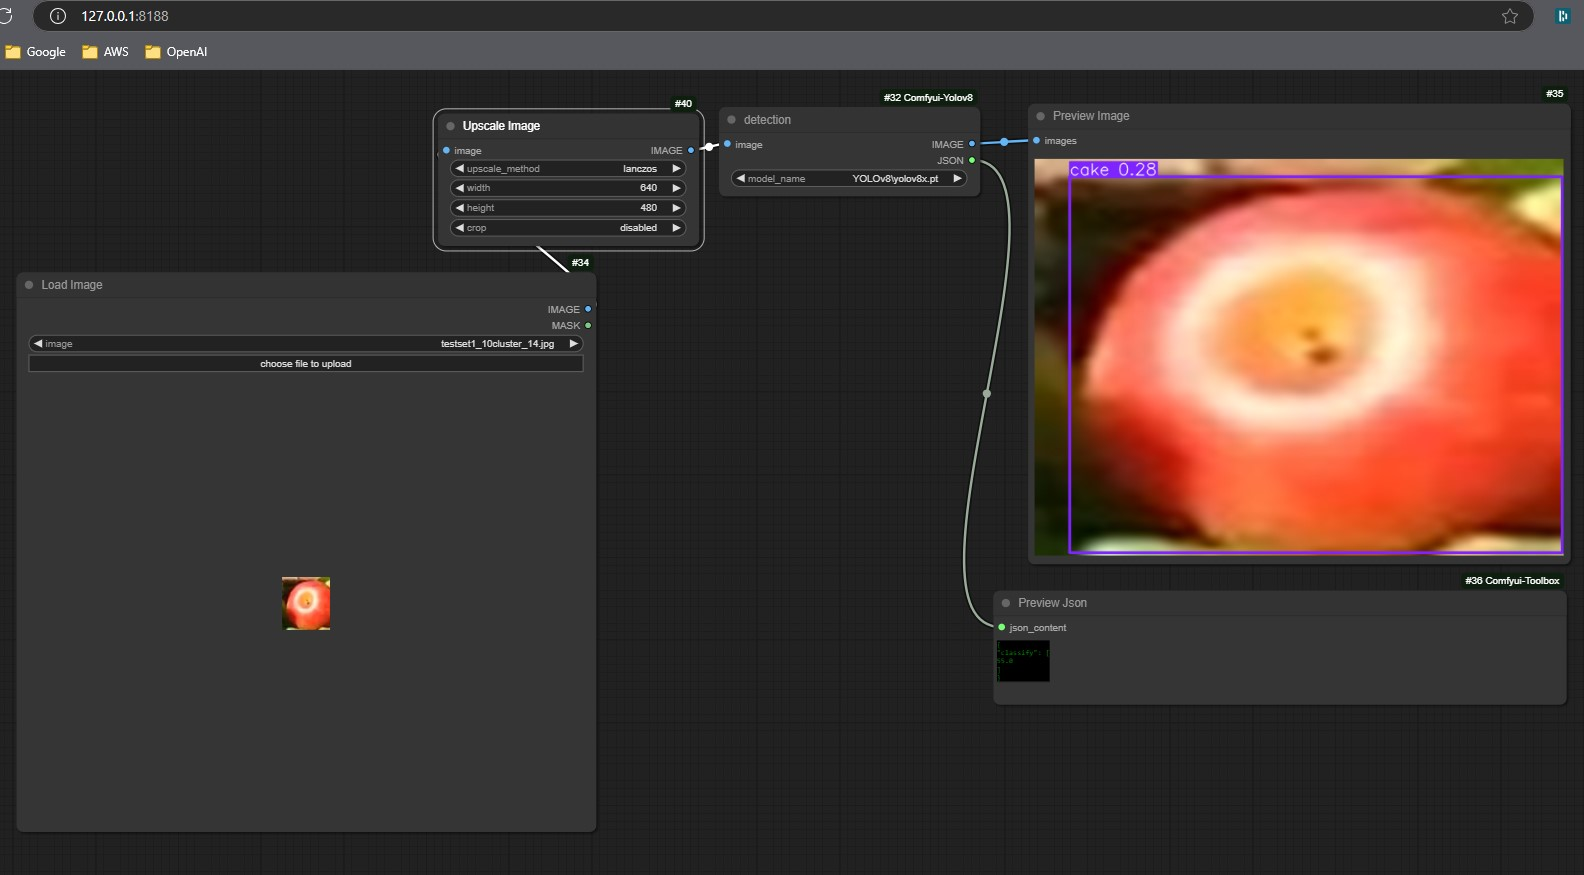
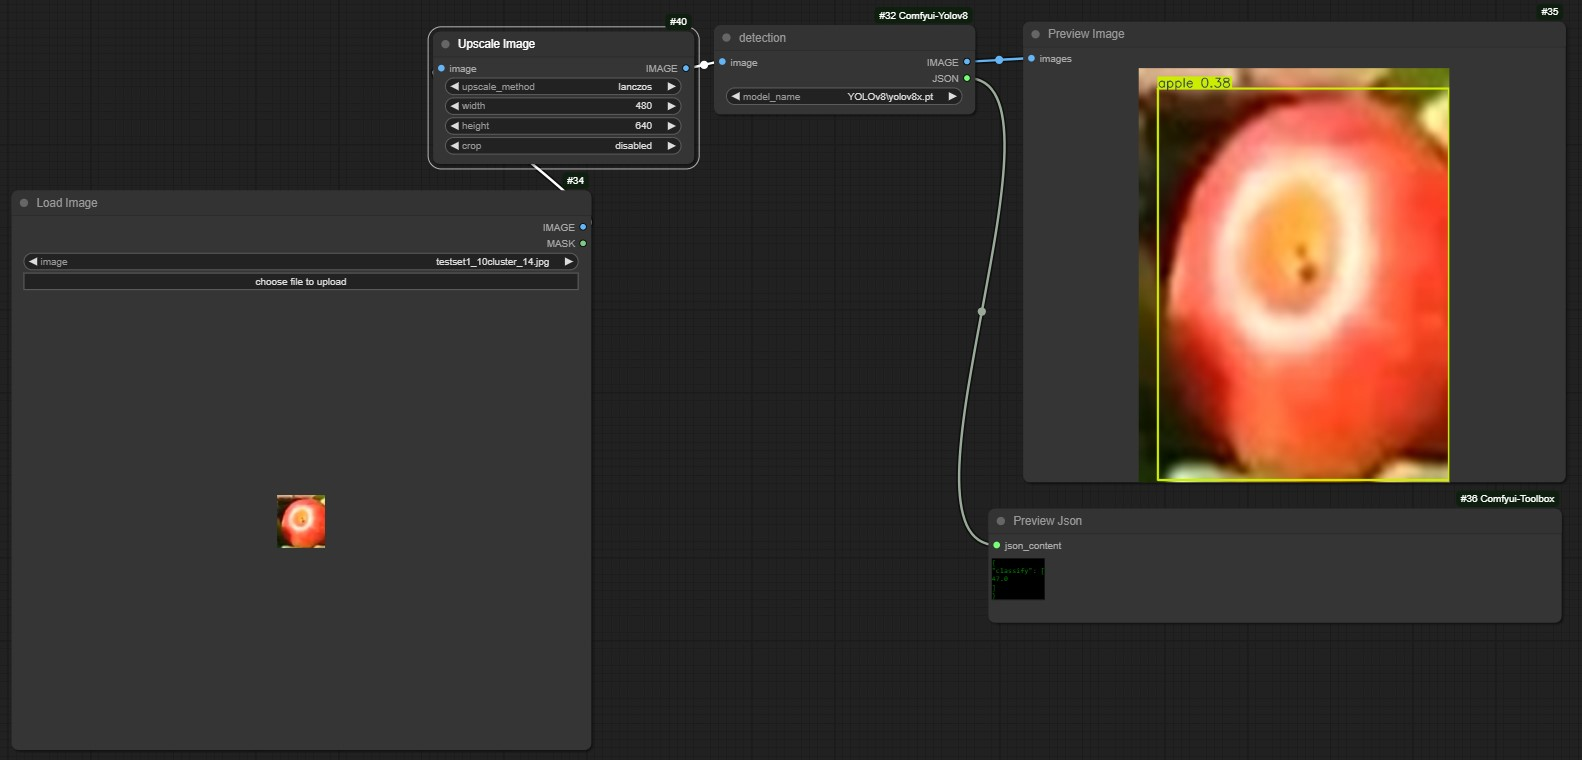

These are done with the Yolo custom node. **This is as far as I have explored with ComfyUI**

Before going down this rabbit hole I want to understand how we use YOLOv5 _directly_, as they do in the papers.

### YOLOv5, .yaml, image labelling

To install Yolov5, go here and follow instructions: https://docs.ultralytics.com/yolov5/quickstart_tutorial/

Yolo runs on labelled data.

It is assumed you have downloaded the MinneApple dataset. You'll see that the images are divided into test, train and val. Train and val both contain a text file that contains the image name and the number of apples in the image; it is actually a ```.csv``` so I changed the file extension from ```.txt``` to ```.csv``` .

```pip install yaml tensorflow torch torchvision torchaudio```
In case you haven't done so, I recommend having the above good to go. Torch should've been covered with ComfyUI install.

YOLO uses ```.yaml``` files for labelled data. You can see I have a script that creates these from a ```.csv```, simply get in there, change the file paths and voila you have a label file.
YOLO then needs _another_ ```.yaml``` to tell it where everything is. I have included an example in this folder named ```yolov5_dataset.yaml```. along with an example ```.yaml``` of the apple count text. 

**So now to own up**: the label files I have made do not work:

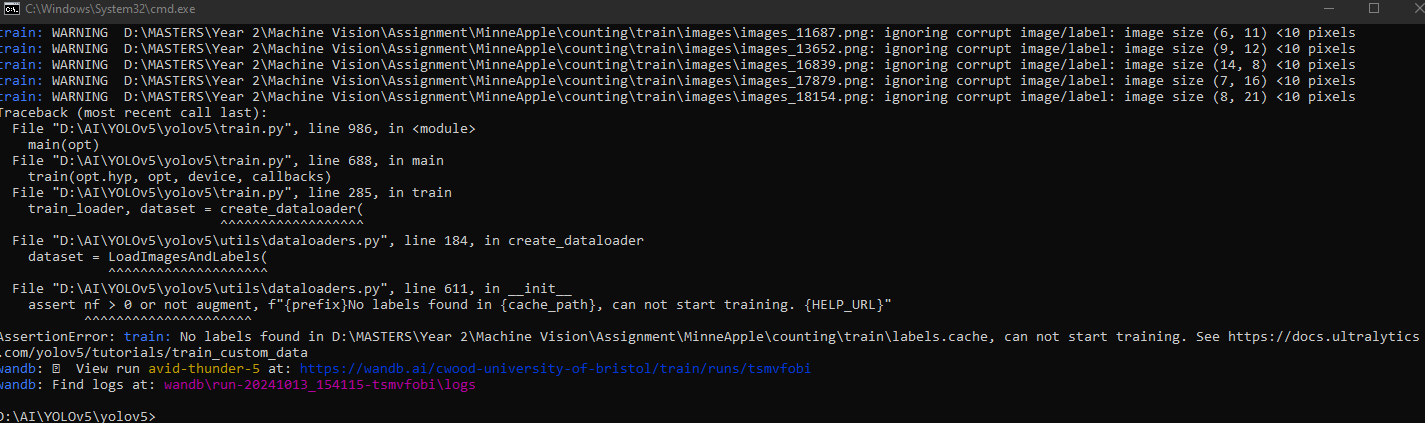

I asked GPT to write a script to do this and it failed. There are something like 60k images in train alone, we can't do that manually. My current approach is to _maybe_ look at labelling the validation batch and working from there, but that still has a few thousand. **The files provided with the data states number of apples, but Yolo requires a bounding box around the object.**

Reviewing ```xiao2024apple``` (see Overleaf), they make no mention of it directly, but they already possess _labelled data_, and we don't. So in this instance, Yolo can't work _directly_. You have seen that the ComfyUI implementation has a bounding box: I don't know where that came from, but that is another avenue.

## Next Steps

1. ResNet appears in one paper and can be used for fine tuning image classification, but one method that has cropped up (I forget where from I'll find a reference) is **CSRNet** ```https://github.com/leeyeehoo/CSRNet-pytorch```, which can count objects without bounding boxes (although I think its use is crowd estimation). More importantly it seems our current label file will suffice from an initial reading of it.
2. ComfyUI, refining the workflow to get good results at scale.